In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r"B:\DATA ANALYST PROJECTS\PYTHON PROJECTS\Social Media Analysis\SOCIAL MEDIA ACTIVE DATA.csv")

In [3]:
df.head(1)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False


In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [6]:
pd.isnull(df).sum()

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64

In [7]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


# GENERAL DESCRIPTIVE ANALYSIS

1-WHAT IS THE DISTRIBUTION OF AGE AMONG USERS?

INVESTIGATE THE AGE DISTRIBUTION TO UNDERSTAND THE USER BASE'S DEMOGRAPHIC COMPOSITION.

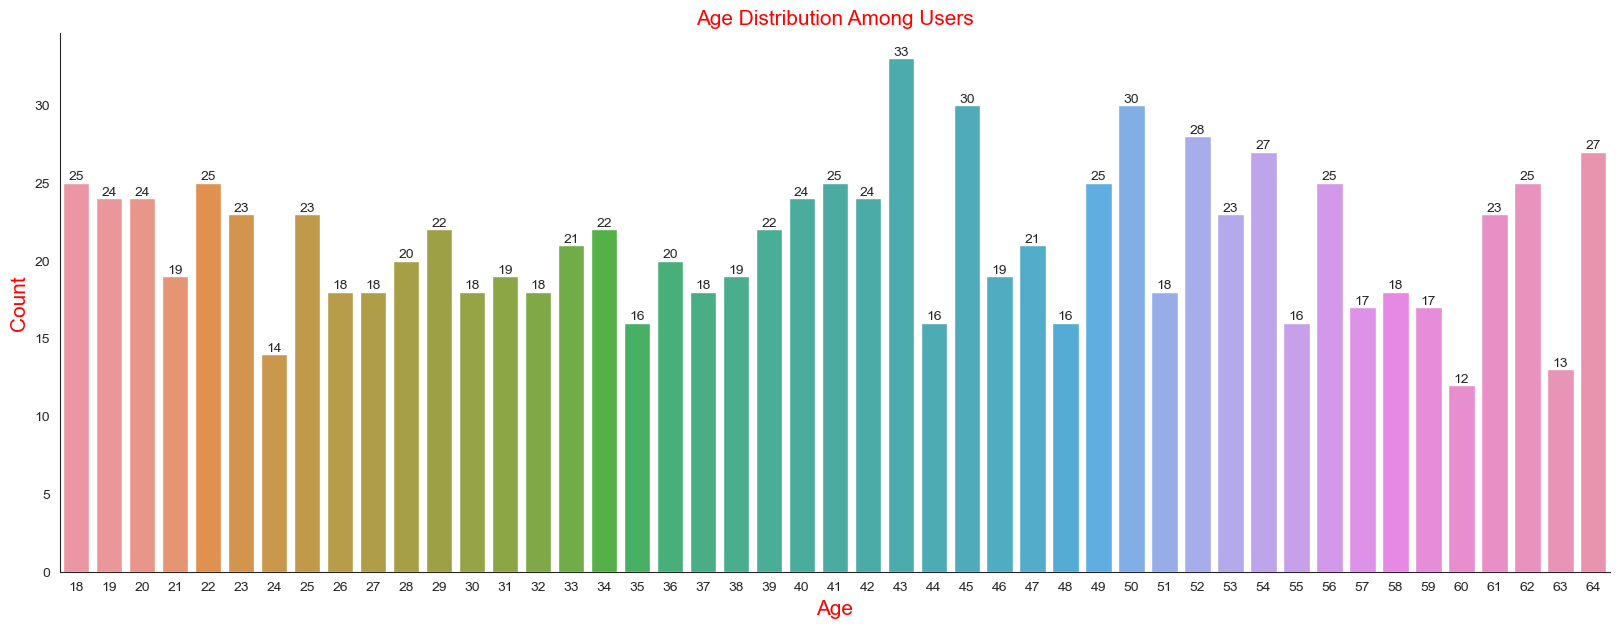

In [8]:
#i can use here histogram(displot) but i want to check each age group total count so i used count plot here.

plt.figure(figsize=(20,7))

sns.set_style('white')
co_value=sns.countplot(x='age',data=df)
co_value.bar_label(co_value.containers[0])
sns.despine()

plt.title('Age Distribution Among Users',fontsize=15).set_color('red')
plt.xlabel('Age',fontsize=15).set_color('red')
plt.ylabel('Count',fontsize=15).set_color('red')
plt.show()

2-GENDER DISTRIBUTION:

HOW IS GENDER DISTRIBUTED ACROSS THE DATASET?

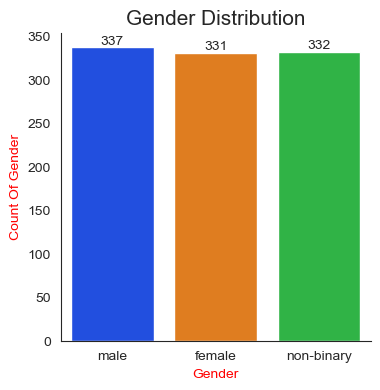

In [9]:
plt.figure(figsize=(4,4))

sns.set_style('white')
cv=sns.countplot(x='gender',data=df,palette='bright')
cv.bar_label(cv.containers[0])
sns.despine()

plt.title('Gender Distribution',fontsize=15)
plt.xlabel('Gender').set_color('red')
plt.ylabel('Count Of Gender').set_color('red')
plt.show()

3-INCOME DISTRIBUTION:

EXPLORE THE INCOME DISTRIBUTION AMONG THE USERS TO IDENTIFY ECONOMIC DIVERSITY.

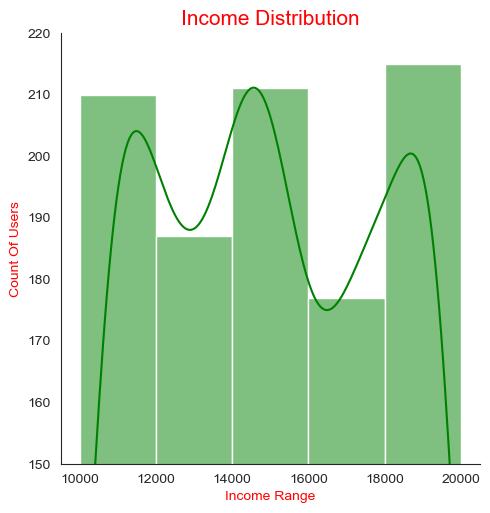

In [10]:
binvalue=[10000,12000,14000,16000,18000,20000]
ax=sns.displot(df['income'],kde=True,bins=binvalue,color='green')
ax.set(ylim=(150, 220)) 

plt.title('Income Distribution',fontsize=15).set_color('red')
plt.xlabel('Income Range').set_color('red')
plt.ylabel('Count Of Users').set_color('red')
plt.show()

# PLATFORM USAGE ANALYSIS

1-TIME SPENT VS. PLATFORM:

WHICH PLATFORMS HAVE THE HIGHEST AVERAGE TIME SPENT, AND HOW DOES THIS DIFFER BY AGE OR GENDER?
(USE BAR OR BOX PLOT)

In [11]:
timeon_platform=df.groupby('platform')['time_spent'].mean().round(2).sort_values(ascending=False)
timeon_platform

platform
Instagram    5.15
Facebook     5.06
YouTube      4.87
Name: time_spent, dtype: float64

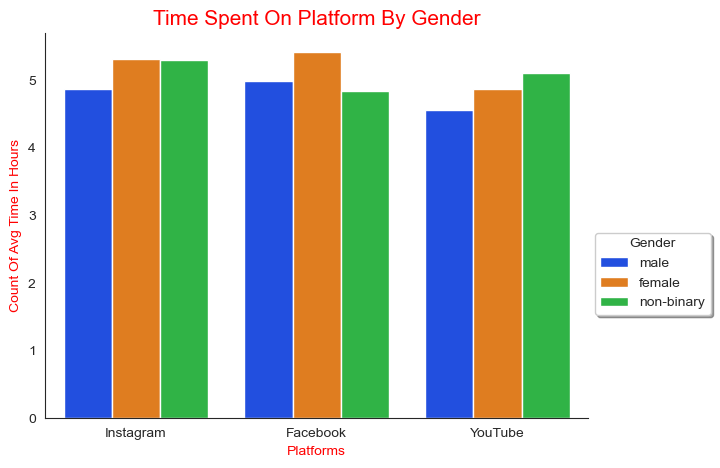

In [12]:
plt.figure(figsize=(7,5))
ax=sns.barplot(x='platform',y='time_spent',data=df,errorbar=('ci',0),hue='gender',palette='bright')
sns.despine()

plt.title('Time Spent On Platform By Gender',fontsize=15).set_color('red')
plt.xlabel('Platforms').set_color('red')
plt.ylabel('Count Of Avg Time In Hours').set_color('red')
plt.legend(title='Gender',loc='upper left', bbox_to_anchor=(1.0, 0.5),shadow=True)

plt.show()

2-DIFF AREA OF PERSONS WITH TIME SPENT:

ARE THERE SPECIFIC INTERESTS THAT CORRELATE WITH MORE TIME SPENT ON THE PLATFORM?

In [13]:
int_platform=df.groupby('interests')['time_spent'].mean().round(2).sort_values(ascending=False)
int_platform

interests
Lifestlye    5.14
Travel       5.09
Sports       4.85
Name: time_spent, dtype: float64

In [14]:
int_platform=df.groupby('interests')['time_spent'].count().round(2).sort_values(ascending=False)
int_platform

interests
Lifestlye    341
Sports       331
Travel       328
Name: time_spent, dtype: int64

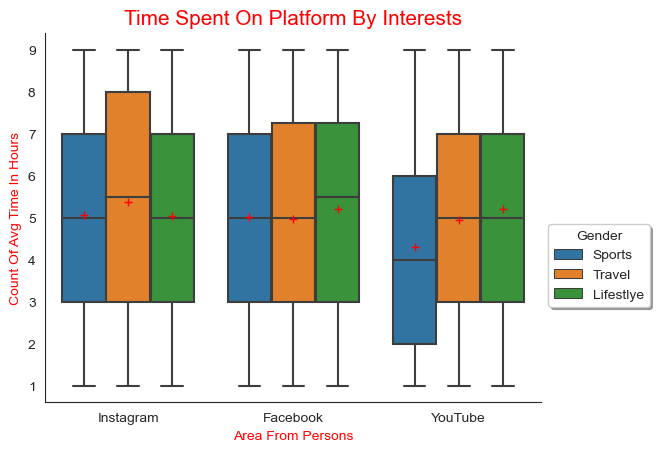

In [15]:
sns.boxplot(x='platform',y='time_spent',data=df,hue='interests',showmeans=True,meanprops={
    'marker':'+',
    'markeredgecolor':'Red'
})
sns.despine()

plt.title('Time Spent On Platform By Interests',fontsize=15).set_color('red')
plt.xlabel('Area From Persons').set_color('red')
plt.ylabel('Count Of Avg Time In Hours').set_color('red')
plt.legend(title='Gender',loc='upper left', bbox_to_anchor=(1.0, 0.5),shadow=True)
plt.show()

FROM THE ABOVE DATA WE CAN SEE THAT-
341 No Of LifeStyle Persons Are Averagely Spent 5.14 Time On Diff Social Media.
332 No Of Sports Person Are Averagely Spent 5.09 Time On Social Media.
328 No Of Travel Person Are Averagely Spent 4.85 Time On Social Media.

3-PROFESSION & TIME SPENT RELATIONSHIP:

HOW DOES PROFESSION VARY ACROSS ON TIME SPENT WITHIN YOUR DATASET.

In [16]:
pro_time=df.groupby('profession')['time_spent'].mean().round(2).sort_values(ascending=False)
pro_time

profession
Marketer Manager     5.10
Student              5.04
Software Engineer    4.95
Name: time_spent, dtype: float64

In [17]:
pro_time.describe()

count    3.000000
mean     5.030000
std      0.075498
min      4.950000
25%      4.995000
50%      5.040000
75%      5.070000
max      5.100000
Name: time_spent, dtype: float64

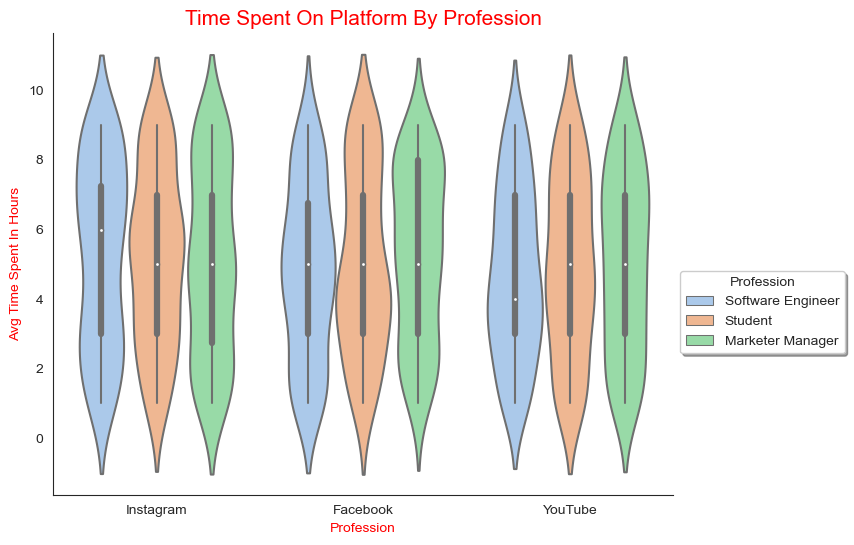

In [18]:
plt.figure(figsize=(8, 6))
ax1=sns.violinplot(x='platform',y='time_spent',data=df,hue='profession',palette='pastel')
sns.despine() 

plt.title('Time Spent On Platform By Profession',fontsize=15).set_color('red')
plt.xlabel('Profession').set_color('red')
plt.ylabel('Avg Time Spent In Hours').set_color('red')
plt.legend(title='Profession',loc='upper left', bbox_to_anchor=(1.0, 0.5),shadow=True)
plt.show()

4-INDEBT RELATIONSHIP:
    
WHAT PERCENTAGE OF USERS ARE IN DEBT, AND HOW DOES THIS CORRELATE WITH PLATFORM?

("INDEBT" COLUMN TELLS US WHETHER PEOPLE OWE MONEY TO OTHERS OR NOT.)

In [19]:
indebt_time=df.groupby('indebt')['time_spent'].count().round(2).sort_values(ascending=False)
indebt_time

indebt
False    503
True     497
Name: time_spent, dtype: int64

In [20]:
indebt_time=df.groupby('indebt')['time_spent'].mean().round(2).sort_values(ascending=False)
indebt_time

indebt
True     5.06
False    5.00
Name: time_spent, dtype: float64

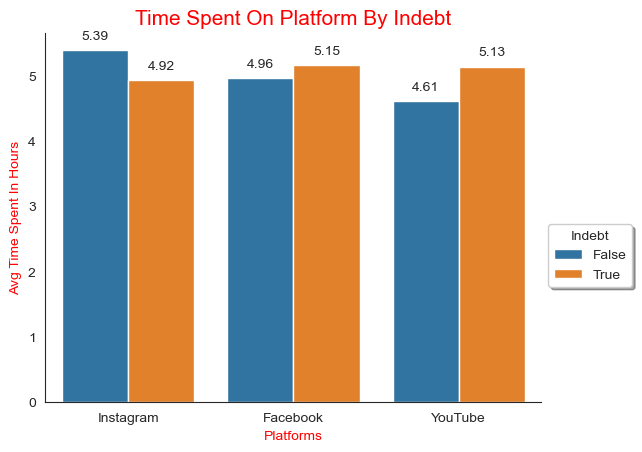

In [21]:
sns.set_style('white')
ax = sns.barplot(x='platform', y='time_spent', data=df, hue='indebt',errorbar=('ci',0))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
sns.despine()    
    
plt.title('Time Spent On Platform By Indebt',fontsize=15).set_color('red')
plt.xlabel('Platforms').set_color('red')
plt.ylabel('Avg Time Spent In Hours').set_color('red')
plt.legend(title='Indebt',loc='upper left', bbox_to_anchor=(1.0, 0.5),shadow=True)
plt.show()

from this Visualization-
I-if Indebt True Then Highest Avg Time On Facebook Which Is 5.15(hh:mm)
II-if Indebt False Then Highest Avg Time On Instagram Which Is 5.39(hh:mm)

3-HOME OWNERSHIP:
    
DO PERSONS OWN HOMES AND SPEND TIME ON PLATFORMS?

In [22]:
homeowner_time=df.groupby('isHomeOwner')['time_spent'].count().round(2).sort_values(ascending=False)
homeowner_time

isHomeOwner
True     508
False    492
Name: time_spent, dtype: int64

In [23]:
homeowner_time=df.groupby('isHomeOwner')['time_spent'].mean().round(2).sort_values(ascending=False)
homeowner_time

isHomeOwner
True     5.10
False    4.95
Name: time_spent, dtype: float64

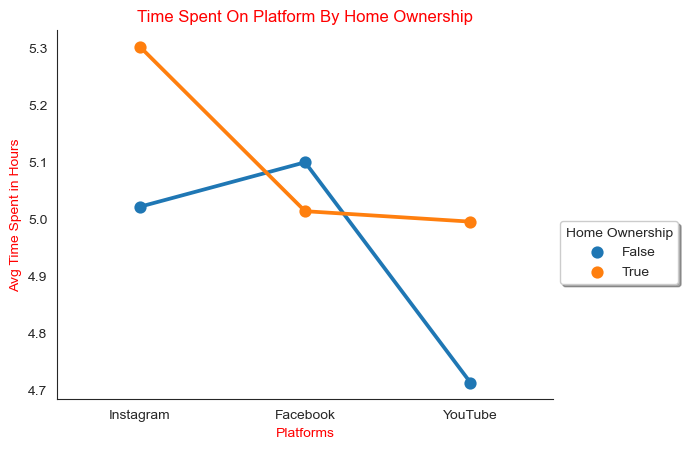

In [24]:
ax=sns.pointplot(x='platform', y='time_spent', data=df,hue='isHomeOwner',errorbar=('ci',0))
sns.despine()

plt.title('Time Spent On Platform By Home Ownership').set_color('red')
plt.xlabel('Platforms').set_color('red')
plt.ylabel('Avg Time Spent in Hours').set_color('red')
plt.legend(title='Home Ownership',loc='upper left', bbox_to_anchor=(1.0, 0.5),shadow=True)
plt.show()

FROM THE ABOVE DATA SET WE CAN SEE THAT-
I-508 Users Who Have Their Own Home They Can Spend 5.10(hh:mm) Avg Time On Diff Social Media.
II-492 Users Who Have Their Own Home They Can Spend 4.95(hh:mm) Avg Time On Diff Social Media.

4-CAR OWNERSHIP DEMOGRAPHICS:    

ANALYZE THE CAR OWNERSHIP FACTORS THAT INFLUENCE THE PLATFORM'S USERS.

In [25]:
carowner_time=df.groupby('Owns_Car')['time_spent'].count().round(2).sort_values(ascending=False)
carowner_time

Owns_Car
True     539
False    461
Name: time_spent, dtype: int64

In [26]:
carowner_time=df.groupby('Owns_Car')['time_spent'].mean().round(2).sort_values(ascending=False)
carowner_time

Owns_Car
False    5.08
True     4.98
Name: time_spent, dtype: float64

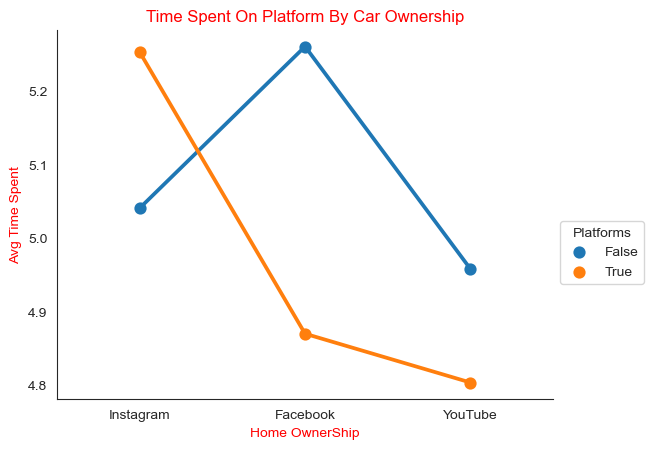

In [27]:
ax=sns.pointplot(x='platform', y='time_spent', data=df,hue='Owns_Car',errorbar=('ci',0))
sns.despine()

plt.title('Time Spent On Platform By Car Ownership').set_color('red')
plt.xlabel('Home OwnerShip').set_color('red')
plt.ylabel('Avg Time Spent').set_color('red')
plt.legend(title='Platforms',loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.show()

FROM THE ABOVE DATA WE CAN SEE THAT-
I-539 Persons Who Has Their Own Cars Can Spent Their 5.08(hh:mm) Avg Time On Social Media.
II-461 Persons Who Has Their Own Cars Can Spent Their 4.98(hh:mm) Avg Time On Social Media.

# CORRELATION AND MULTIVARIATE ANALYSIS

1-MULTIVARIATE CORRELATION:

EXPLORE CORRELATIONS BETWEEN CONTINUOUS VARIABLES LIKE INCOME AND TIME SPENT ON THE PLATFORM.USE HEATMAPS TO VISUALIZE THESE CORRELATIONS.

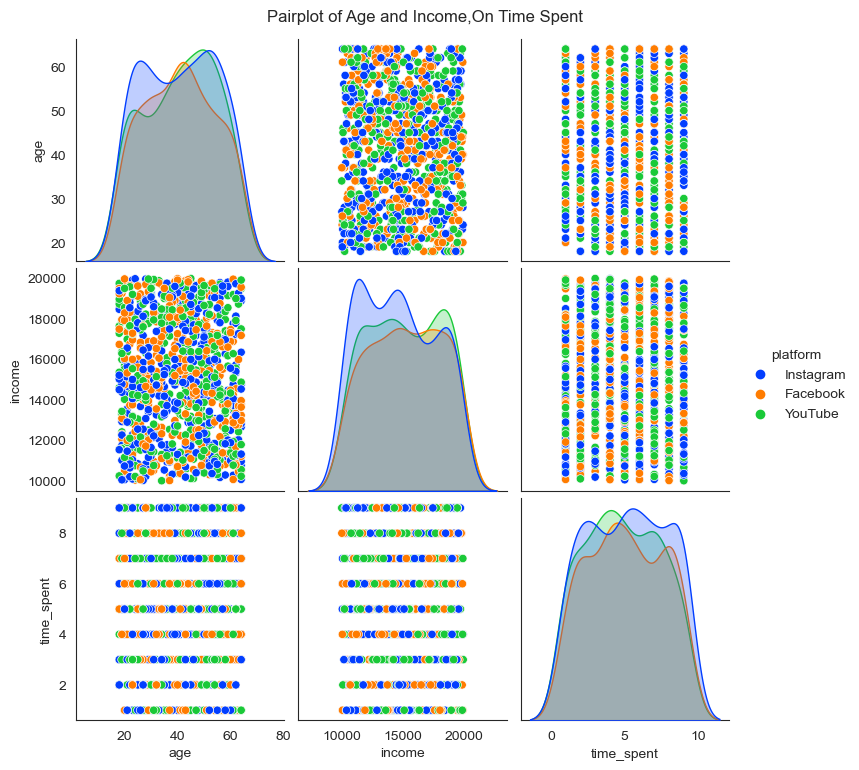

In [28]:
pairplot = sns.pairplot(df, vars=['age', 'income','time_spent'], hue='platform', palette='bright')
pairplot.fig.suptitle('Pairplot of Age and Income,On Time Spent', y=1.02)
plt.show()

2-MULTIVARIATE CORRELATION:

A-EXPLORE CORRELATIONS BETWEEN CONTINUOUS VARIABLES LIKE AGE, AND TIME SPENT ON THE PLATFORM.

B-EXPLORE CORRELATIONS BETWEEN CONTINUOUS VARIABLES LIKE AGE, AND TIME SPENT ON THE GENDER.

In [29]:
Ageon_platform = df.groupby('age')['time_spent'].mean().round(2)
Ageon_platform_sorted = Ageon_platform.sort_index(ascending=True)
Ageon_platform_sorted

age
18    5.24
19    5.92
20    5.75
21    5.32
22    5.16
23    4.26
24    5.36
25    4.65
26    4.28
27    4.67
28    5.60
29    4.77
30    5.06
31    4.26
32    4.33
33    5.00
34    5.45
35    5.00
36    4.85
37    4.89
38    5.79
39    5.77
40    5.00
41    5.64
42    5.25
43    4.91
44    5.62
45    4.87
46    3.37
47    5.00
48    6.19
49    5.68
50    5.10
51    4.89
52    4.64
53    5.74
54    4.59
55    5.50
56    4.84
57    5.00
58    4.00
59    5.18
60    4.92
61    4.78
62    4.76
63    4.46
64    4.85
Name: time_spent, dtype: float64

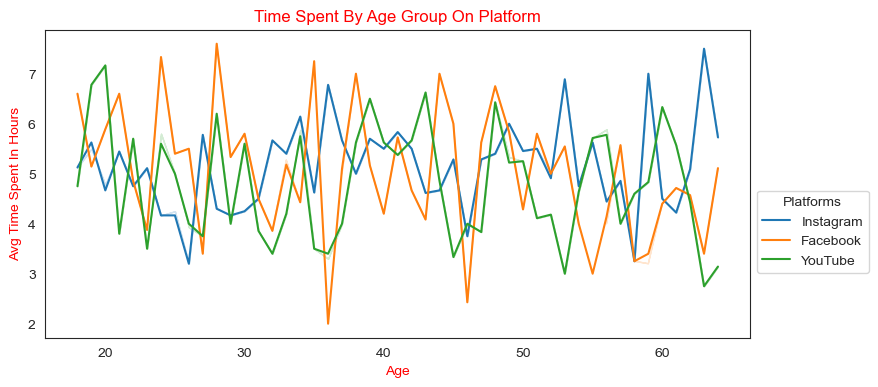

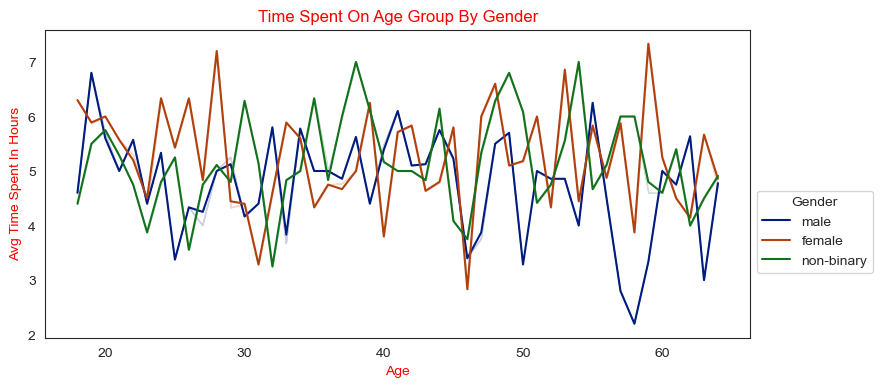

In [30]:
plt.figure(figsize=(20,4))
plt.subplot(1, 2, 1)
sns.lineplot(x='age',y='time_spent',data=df,hue='platform',errorbar=('ci',0))
plt.title('Time Spent By Age Group On Platform').set_color('red')
plt.legend(title='Platforms',loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Age').set_color('red')
plt.ylabel('Avg Time Spent In Hours').set_color('red')

plt.figure(figsize=(20,4))
plt.subplot(1, 2, 2)
sns.lineplot(x='age',y='time_spent',data=df,hue='gender',errorbar=('ci',0),palette='dark')
plt.title('Time Spent On Age Group By Gender').set_color('red')
plt.legend(title='Gender',loc='upper left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Age').set_color('red')
plt.ylabel('Avg Time Spent In Hours').set_color('red')
plt.show()

# GEOGRAPHIC AND LOCATION-BASED ANALYSIS

1-TIME SPENT BY LOCATION ANALYSIS:

HOW ARE USERS DISTRIBUTED ACROSS DIFFERENT LOCATIONS, AND HOW DO PLATFORM USAGE AND INTERESTS VARY BY LOCATION?

In [31]:
loc_level=df.groupby('location')['time_spent'].mean().round(2).sort_values(ascending=False)
loc_level

location
Australia         5.22
United States     4.94
United Kingdom    4.91
Name: time_spent, dtype: float64

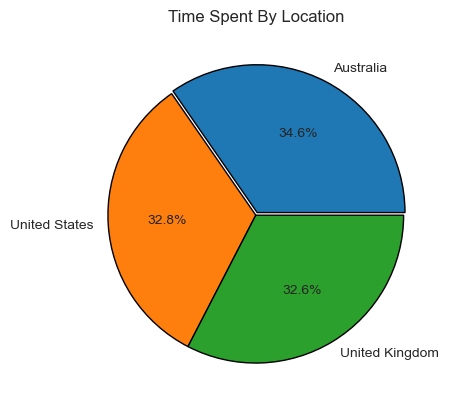

In [32]:
exp=0.02,0.0,0.0
plt.pie(loc_level,labels=loc_level.index,autopct='%0.1f%%',wedgeprops={'linewidth':1,'edgecolor':'black'},explode=exp)
plt.title('Time Spent By Location')
plt.show()

From the above data,we can see that:

I-34.6% of people from Australia are spending their 5.22 (hh:mm) average time on social media.

II-32.8% of people from the United States spend their 4.94 (hh:mm) average time on social media.

III-32.6% of people from the United Kingdom are spending their 4.91 (hh:mm) average time on social media.

2-TIME SPENT BY DEMOGRAPHICS AREA  ANALYSIS:

IS IT POSSIBLE TO PREDICT A USER'S LOCATION BASED ON THEIR TIME SPENT ON PLATFORMS AND OTHER DEMOGRAPHIC FACTORS?

In [33]:
demog_level=df.groupby('demographics')['time_spent'].mean().round(2).sort_values(ascending=False)
demog_level

demographics
Sub_Urban    5.27
Rural        5.02
Urban        4.79
Name: time_spent, dtype: float64

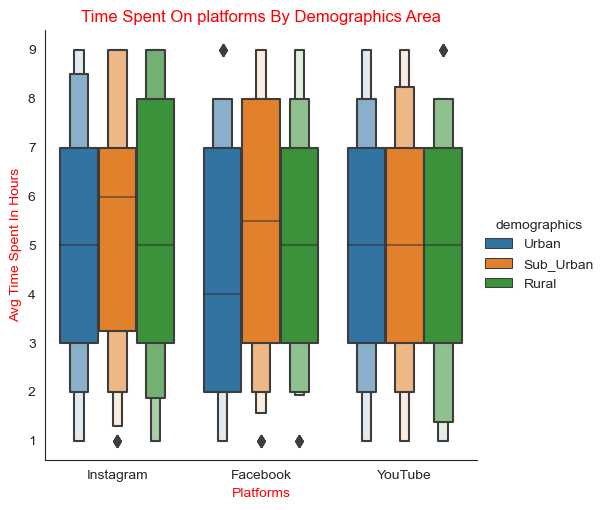

In [34]:
sns.catplot(x='platform',y='time_spent',data=df,hue='demographics',kind='boxen')
sns.set_style('darkgrid')
plt.title('Time Spent On platforms By Demographics Area').set_color('red')
plt.xlabel('Platforms').set_color('red')
plt.ylabel('Avg Time Spent In Hours').set_color('red')
plt.show()

From this data:
I-Sub Urban Area People Can Spent Their Max 5.27(hh:mm) Time on Platforms While Urban People Can Spent Their Lowest 
Time on Paltforms, which is 4.79.